### 01. AARRR - Acquisition

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
# 1. 데이터 확인
df.shape

(200, 5)

In [9]:
# 2. 결측치 확인
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [14]:
# 3. 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
# 4. 분석에 필요한 컬럼만 선별
df = df[['TV','radio','newspaper','sales']]
print(df.shape)
df.head()

(200, 4)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
# 5. 기술통계 확인
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
# 6. 변수간의 correlation을 확인 
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [22]:
corr = df.corr()

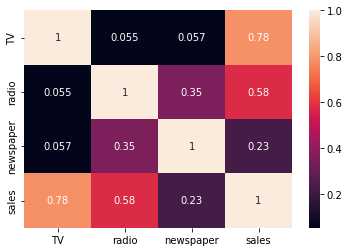

In [27]:
# 7. correlation을 시각화로 보는 습관이 필요 하다.
sns.heatmap(corr, annot=True);

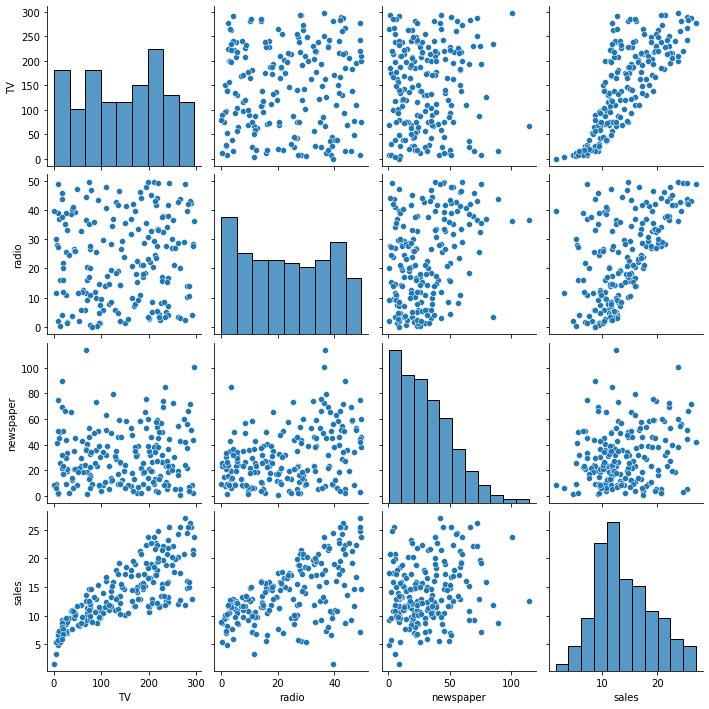

In [28]:
# 8. 변수간 페어 플롯으로 확인
sns.pairplot(df,'TV','radio')

In [4]:
# 라벨과 피처 지정
labels = df['sales']
features = df[['TV','radio','newspaper']]


In [6]:
labels.shape

(200,)

In [7]:
features.shape

(200, 3)

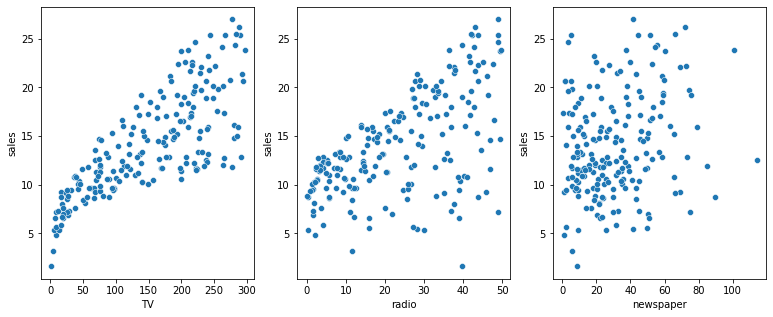

In [30]:
# 선형회귀전 정확한 시각화

# 한 화면에 시각화
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3)

# 시각화 사이즈
figure.set_size_inches(13, 5)

sns.scatterplot(data=df, x='TV', y='sales', ax=ax1)
sns.scatterplot(data=df, x='radio', y='sales', ax=ax2)
sns.scatterplot(data=df, x='newspaper', y='sales', ax=ax3);

In [35]:
# 선형회귀로 분석
# OLS를 사용하여 분석
import statsmodels.formula.api as sm

# .osl로 y값을 넣고 그 다음 비교하고자하는 x값을 '+'를 써서 나열
model1 = sm.ols(formula = "sales ~ TV + radio + newspaper", data=df).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        11:05:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [38]:
# sklearn으로 같은 분석이 가능
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(features, labels)
print(model.intercept_, model.coef_)

2.938889369459412 [ 0.04576465  0.18853002 -0.00103749]


In [48]:
# 변수의 포함여부에 따른 osl결과 비교.

model1 = sm.ols(formula = "sales ~ TV + radio + newspaper", data=df).fit()
model2 = sm.ols(formula = "sales ~ TV + radio", data=df).fit()
model3 = sm.ols(formula = "sales ~ TV", data=df).fit()

print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        12:08:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [42]:
# 앞으로의 sales 예측
model1.predict({"TV":300, "radio":10, "newspaper":4})

0    18.549433
dtype: float64

In [44]:
sales = 2.9389 + 0.0458*300 + 0.1885*10 + 0.001*4
sales

18.5679

In [51]:
model1.predict({"TV":[300,200,100], "radio":[300,200,100], "newspaper":[300,200,100]})

0    72.916040
1    49.590323
2    26.264606
dtype: float64

In [49]:
model3.predict({"TV":[300,200,100]})

0    21.293586
1    16.539922
2    11.786258
dtype: float64

In [50]:
model4.predict({"newspaper":[300,200,100]})

0    28.759337
1    23.290027
2    17.820717
dtype: float64

### 데이터 변환 후 재분석

C:\devtools\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\devtools\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\devtools\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

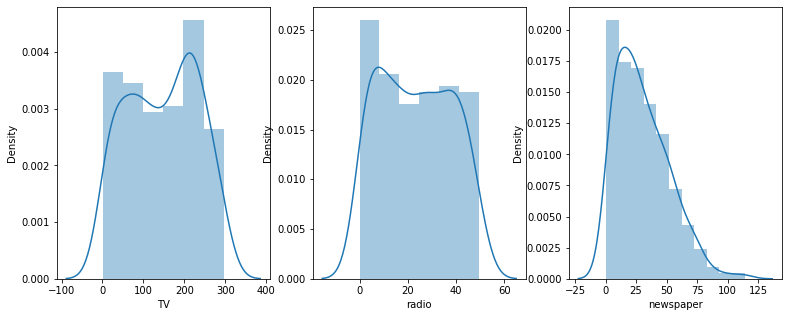

In [56]:
# 미디어별 매체비 분포를 distplot으로 재시각화

# 한 화면에 시각화
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3)

# 시각화 사이즈
figure.set_size_inches(13, 5)
sns.distplot(df['TV'], ax=ax1)
sns.distplot(df['radio'], ax=ax2);
sns.distplot(df['newspaper'], ax=ax3);

In [62]:
# 정규화 진행
df['log_newspaper'] = np.log(df['newspaper'] + 1) # 무한대가 되지않게 하기 위해 +1
print(df.shape)
df[['log_newspaper', 'newspaper']]

(200, 5)


,log_newspaper,newspaper
0,4.251348,69.2
1,3.830813,45.1
2,4.252772,69.3
3,4.085976,58.5
4,4.084294,58.4
...,...,...
195,2.694627,13.8
196,2.208274,8.1
197,2.001480,6.4
198,4.207673,66.2


C:\devtools\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\devtools\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\devtools\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

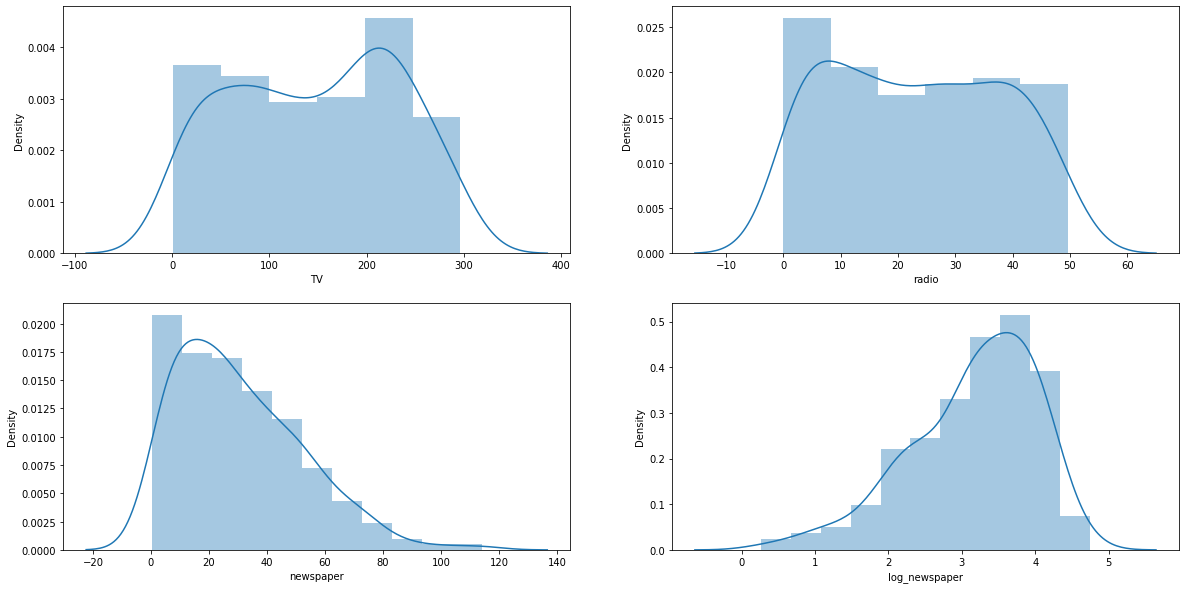

In [64]:
# 정규화 이후 시각화 다시 진행

# 한 화면에 시각화
figure, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

# 시각화 사이즈
figure.set_size_inches(20,10)

sns.distplot(df['TV'], ax=ax1)
sns.distplot(df['radio'], ax=ax2);
sns.distplot(df['newspaper'], ax=ax3);
sns.distplot(df['log_newspaper'], ax=ax4);

In [66]:
# 이 데이터로 다시 OLS 분석 
model1 = sm.ols(formula = "sales ~ TV + radio + newspaper", data=df).fit()
model4 = sm.ols(formula = "sales ~ TV + radio + log_newspaper", data=df).fit()

print(model1.summary())
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        16:30:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0